### lightGBM on data with seasonality

In [1]:
from darts.models.forecasting.lgbm import LightGBMModel
from darts import TimeSeries

from darts.utils.statistics import extract_trend_and_seasonality, check_seasonality

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/mahdi/anaconda3/envs/darts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
#df = pd.read_csv('datasets/air_quality/BeijingPM25_0.csv')
df = pd.read_csv('datasets/retail/air_passengers.csv')

In [3]:
len(df)

144

In [4]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<Axes: xlabel='ds'>

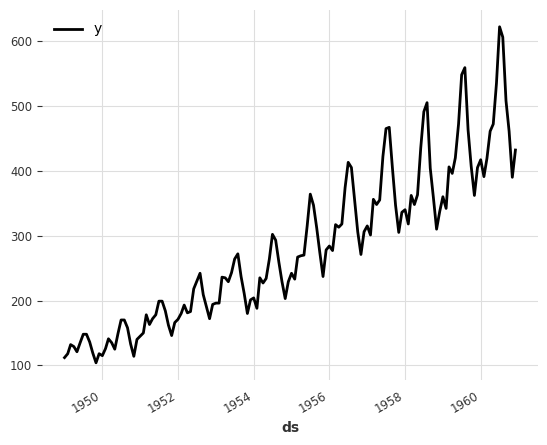

In [5]:
target_series = TimeSeries.from_dataframe(df, 'ds', 'y')

target_series.plot()

### Seasonality-Related Processing

In [6]:
check_seasonality(target_series)

(True, 12)

In [7]:
from darts.utils.utils import ModelMode
tmp = extract_trend_and_seasonality(target_series, model=ModelMode.MULTIPLICATIVE)#, method='STL'
target_series_trend, target_series_seasonal = tmp[0], tmp[1]

target_series_irregular = target_series / (target_series_trend * target_series_seasonal)

<Axes: xlabel='ds'>

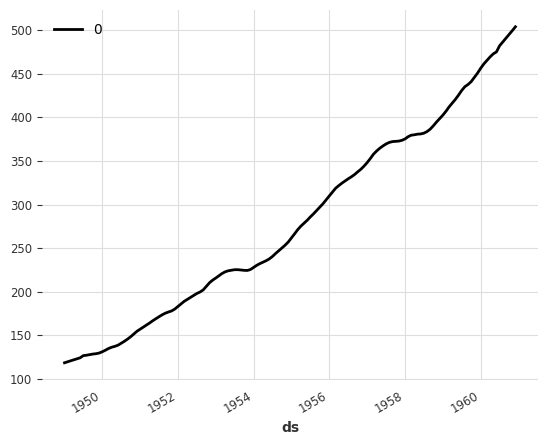

In [8]:
target_series_trend.plot()

<Axes: xlabel='ds'>

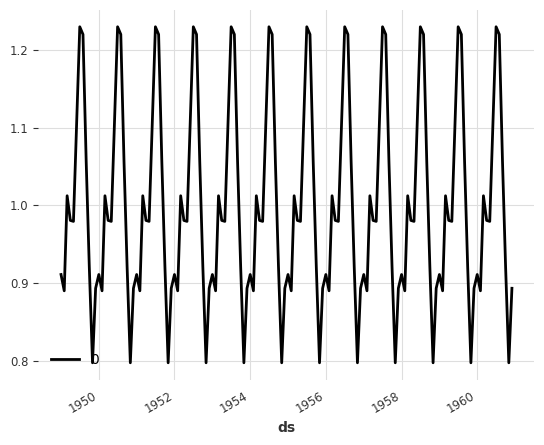

In [9]:
target_series_seasonal.plot()

<Axes: xlabel='ds'>

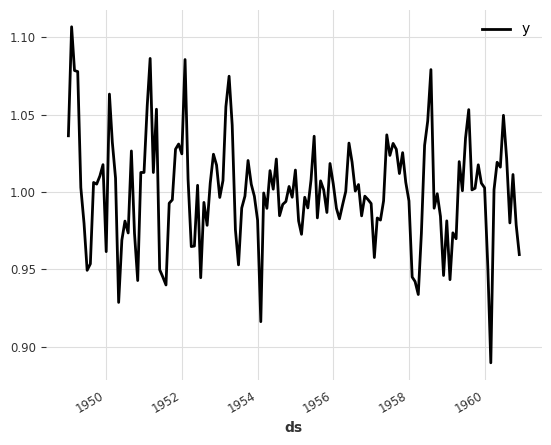

In [10]:
target_series_irregular.plot()

In [11]:
target_series_reconstructed = target_series_trend*target_series_seasonal*target_series_irregular

<Axes: xlabel='ds'>

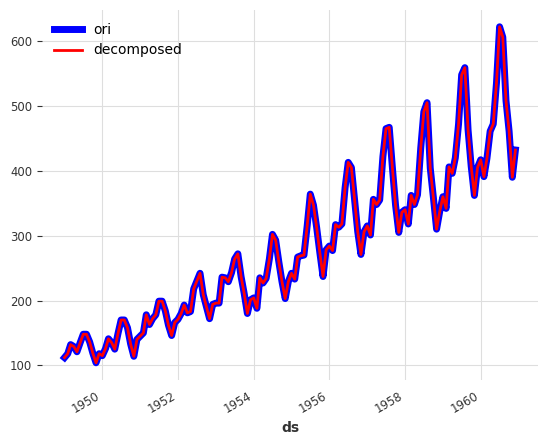

In [12]:
target_series_reconstructed.plot(alpha=1, color='b', linewidth=5, label='ori')
target_series.plot(alpha=0.8, color='r', ls='-', label='decomposed', linewidth=2)


In [13]:
num_test = 24
target_series_train, target_series_test = target_series[:-num_test], target_series[-num_test:]

target_series_trend_train, target_series_trend_test = \
    target_series_trend[:-num_test], target_series_trend[-num_test:]

target_series_seasonal_train, target_series_seasonal_test = \
    target_series_seasonal[:-num_test], target_series_seasonal[-num_test:]

target_series_irregular_train, target_series_irregular_test = \
    target_series_irregular[:-num_test], target_series_irregular[-num_test:]


<Axes: xlabel='ds'>

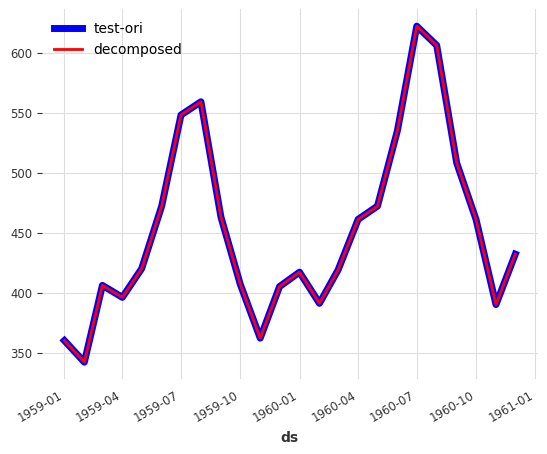

In [14]:
#target_series_val.plot(label='validation')
target_series_test.plot(alpha=1, color='b', linewidth=5, label='test-ori')

target_series_test_reconstructed = target_series_trend_test*target_series_seasonal_test*target_series_irregular_test
target_series_test_reconstructed.plot(alpha=0.8, color='r', ls='-', label='decomposed', linewidth=2)

In [15]:
n_lags = 12
model_trend = LightGBMModel(lags=n_lags, output_chunk_length=num_test)
model_seasonal = LightGBMModel(lags=n_lags, output_chunk_length=num_test)
model_irregular = LightGBMModel(lags=n_lags, output_chunk_length=num_test)

In [16]:
model_trend.fit(series=target_series_trend_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 85, number of used features: 12
[LightGBM] [Info] Start training from score 227.725000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LightGBMModel(lags=12, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=24, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None)

In [17]:
model_seasonal.fit(series=target_series_seasonal_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 85, number of used features: 12
[LightGBM] [Info] Start training from score 0.998956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LightGBMModel(lags=12, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=24, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None)

In [18]:
model_irregular.fit(series=target_series_irregular_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 85, number of used features: 12
[LightGBM] [Info] Start training from score 0.999991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LightGBMModel(lags=12, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=24, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None)

In [19]:
target_series_trend_test_pred = model_trend.predict(num_test)
target_series_seasonal_test_pred = model_seasonal.predict(num_test)
target_series_irregular_test_pred = model_irregular.predict(num_test)

<Axes: xlabel='ds'>

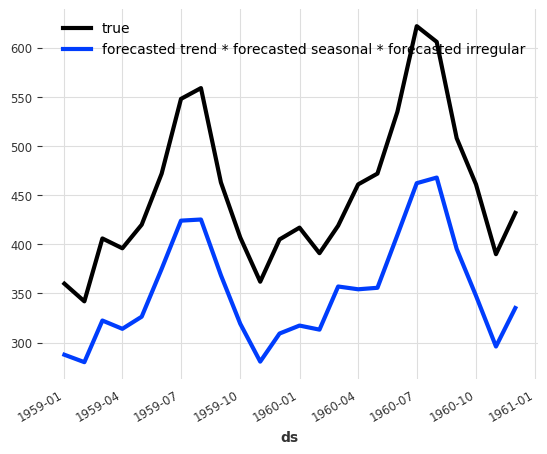

In [21]:
#target_series_train.plot(label='training')
target_series_test.plot(label='true', lw=3)
target_series_test_reconstructed_pred = \
    target_series_trend_test_pred*target_series_seasonal_test_pred*target_series_irregular_test_pred
target_series_test_reconstructed_pred.plot(label='forecasted trend * \
                                           forecasted seasonal * forecasted irregular', lw=3)

<Axes: xlabel='ds'>

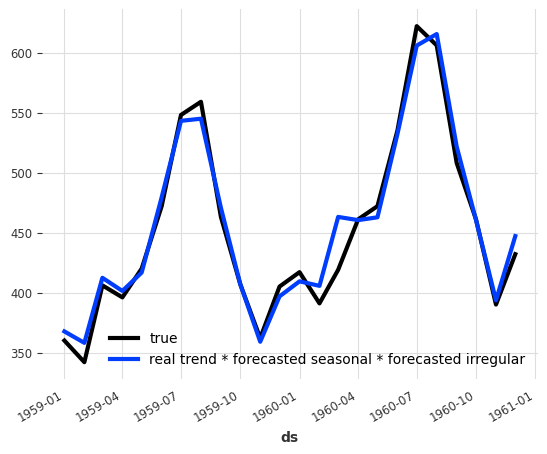

In [26]:
target_series_test.plot(label='true', lw=3)
target_series_test_reconstructed_pred = \
    target_series_trend_test*target_series_seasonal_test_pred*target_series_irregular_test_pred

target_series_test_reconstructed_pred.plot(label='real trend * forecasted seasonal * forecasted irregular', lw=3)

<Axes: xlabel='ds'>

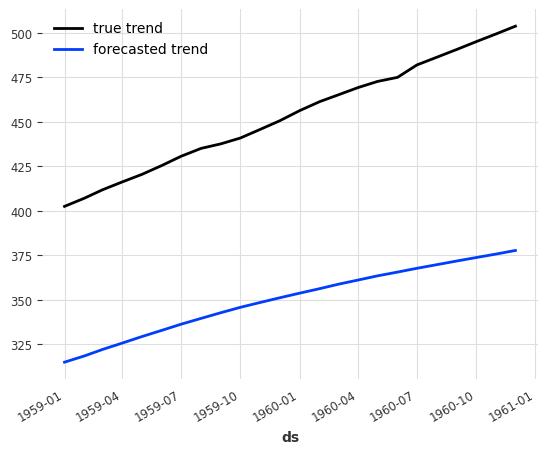

In [28]:
target_series_trend_test.plot(label='true trend')
target_series_trend_test_pred.plot(label='forecasted trend')